In [1]:
import os
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error, mean_absolute_error

# from xgboost import XGBRegressor

# # Plotting function
# def plot_forecasts(train, test, predictions, title):
#     plt.figure(figsize=(12, 6))
#     plt.plot(train.index, train.values, label='Train')
#     plt.plot(test.index, test.values, label='Test')
#     plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Values')
#     plt.legend()
#     plt.show()

# # Evaluation function
# def evaluate_forecast(actual, predicted):
#     rmse = np.sqrt(mean_squared_error(actual, predicted))
#     mae = mean_absolute_error(actual, predicted)
#     return rmse, mae

# # Exponential Smoothing (ETS)
# def ets_forecast(train, test, seasonal='add', seasonal_periods=12):
#     model = ExponentialSmoothing(train, trend='add', seasonal=seasonal, seasonal_periods=seasonal_periods)
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=len(test))
#     return forecast

# # ARIMA
# def arima_forecast(train, test, order=(5,1,0)):
#     model = ARIMA(train, order=order)
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=len(test))
#     return forecast

# # SARIMA
# def sarima_forecast(train, test, order=(1,1,1), seasonal_order=(1,1,1,12)):
#     model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
#     forecast = model_fit.forecast(steps=len(test))
#     return forecast

# # Prophet
# def prophet_forecast(train, test):
#     df = train.reset_index()
#     df.columns = ['ds', 'y']
#     model = Prophet()
#     model.fit(df)
#     future = model.make_future_dataframe(periods=len(test))
#     forecast = model.predict(future)
#     return forecast['yhat'][-len(test):].values

# # LSTM
# def lstm_forecast(train, test, look_back=1, epochs=20, batch_size=1):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
#     test_scaled = scaler.transform(test.values.reshape(-1, 1))

#     def create_dataset(dataset, look_back=1):
#         X, Y = [], []
#         for i in range(len(dataset) - look_back - 1):
#             a = dataset[i:(i + look_back), 0]
#             X.append(a)
#             Y.append(dataset[i + look_back, 0])
#         return np.array(X), np.array(Y)
    
#     trainX, trainY = create_dataset(train_scaled, look_back)
#     testX, testY = create_dataset(test_scaled, look_back)
#     trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#     testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
#     model = Sequential()
#     model.add(LSTM(4, input_shape=(1, look_back)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=2)
    
#     testPredict = model.predict(testX)
#     testPredict = scaler.inverse_transform(testPredict)
#     return testPredict.flatten()

# # XGBoost
# def xgboost_forecast(train, test, look_back=1):
#     def create_dataset(dataset, look_back=1):
#         X, Y = [], []
#         for i in range(len(dataset) - look_back):
#             X.append(dataset[i:(i + look_back)])
#             Y.append(dataset[i + look_back])
#         return np.array(X), np.array(Y)
    
#     trainX, trainY = create_dataset(train.values, look_back)
#     testX, testY = create_dataset(test.values, look_back)
    
#     model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
#     model.fit(trainX, trainY)
    
#     testPredict = model.predict(testX)
#     return testPredict

# # City forecasting with plotting
# def city_forecasting_with_plot(city, train, test, model_func, plot=True, **kwargs):
#     train_city = train[train['city'] == city]
#     test_city = test[test['city'] == city]
    
#     train_city.set_index('date', inplace=True)
#     test_city.set_index('date', inplace=True)
    
#     train_values = train_city.drop(columns=['city'])
#     test_values = test_city.drop(columns=['city'])
    
#     forecasts = {}
#     metrics = {}
#     for col in train_values.columns:
#         train_series = train_city[col]
#         test_series = test_city[col]
        
#         forecast = model_func(train_series, test_series, **kwargs)
#         forecasts[col] = forecast
        
#         rmse, mae = evaluate_forecast(test_series, forecast)
#         metrics[col] = {'RMSE': rmse, 'MAE': mae}
        
#         if plot:
#             plot_forecasts(train_series, test_series, forecast, title=f'{city} - {col}')
    
#     return forecasts, metrics

# # Load data
# train_data = pd.read_csv('/mnt/data/train_dataset.csv', parse_dates=['date'])
# test_data = pd.read_csv('/mnt/data/test_dataset.csv', parse_dates=['date'])

# # Ensure 'date' is set as the index
# train_data.set_index('date', inplace=True)
# test_data.set_index('date', inplace=True)

# # Example: Testing Exponential Smoothing on a city
# ets_forecasts, ets_metrics = city_forecasting_with_plot('Ahmedabad', train_data, test_data, ets_forecast, seasonal='add', seasonal_periods=12)
# print("ETS Metrics for Ahmedabad:", ets_metrics)

# # Example: Testing Exponential Smoothing on another city
# ets_forecasts, ets_metrics = city_forecasting_with_plot('Delhi', train_data, test_data, ets_forecast, seasonal='add', seasonal_periods=12)
# print("ETS Metrics for Delhi:", ets_metrics)


d:\ML-Projects\03-Air-Quality-Index-Predictor\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train_data = pd.read_csv(r"artifacts\data_transformation\train_dataset.csv", parse_dates=['date'])
test_data = pd.read_csv(r"artifacts\data_transformation\test_dataset.csv", parse_dates=['date'])


In [5]:
# train_data.set_index('date', inplace=True)
# test_data.set_index('date', inplace=True)

In [11]:
# Plotting function
def plot_forecasts(train, test, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train.values, label='Train')
    plt.plot(test.index, test.values, label='Test')
    plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Evaluation function
def evaluate_forecast(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    return rmse, mae

# City forecasting with plotting
def city_forecasting_with_plot(city, train, test, model_func, plot=True, **kwargs):
    train_city = train[train['city'] == city]
    test_city = test[test['city'] == city]
    
    train_city.set_index('date', inplace=True)
    test_city.set_index('date', inplace=True)
    
    # Set the frequency explicitly to weekly ('W')
    train_city = train_city.asfreq('W')
    test_city = test_city.asfreq('W')
    
    train_values = train_city.drop(columns=['city'])
    test_values = test_city.drop(columns=['city'])
    
    forecasts = {}
    metrics = {}
    for col in train_values.columns:
        train_series = train_city[col]
        test_series = test_city[col]
        
        forecast = model_func(train_series, test_series, **kwargs)
        if forecast is None:
            print(f"Warning: Forecast for {col} is None")
            continue
        
        forecasts[col] = forecast
        
        try:
            rmse, mae = evaluate_forecast(test_series, forecast)
            metrics[col] = {'RMSE': rmse, 'MAE': mae}
        except Exception as e:
            print(f"Error in evaluating forecast for {col}: {e}")
            continue
        
        if plot:
            plot_forecasts(train_series, test_series, forecast, title=f'{city} - {col}')
    
    return forecasts, metrics

## 1. Exponential Smoothing

In [12]:
# Exponential Smoothing (ETS)
def ets_forecast(train, test, seasonal='add', seasonal_periods=12):
    model = ExponentialSmoothing(train, trend='add', seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

Forecasting for Delhi using Exponential Smoothing (ETS)


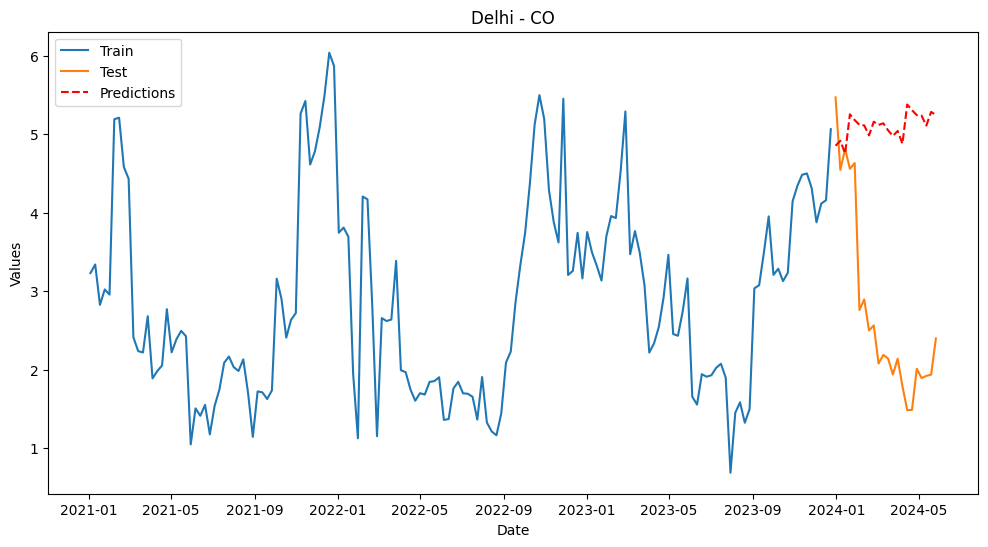

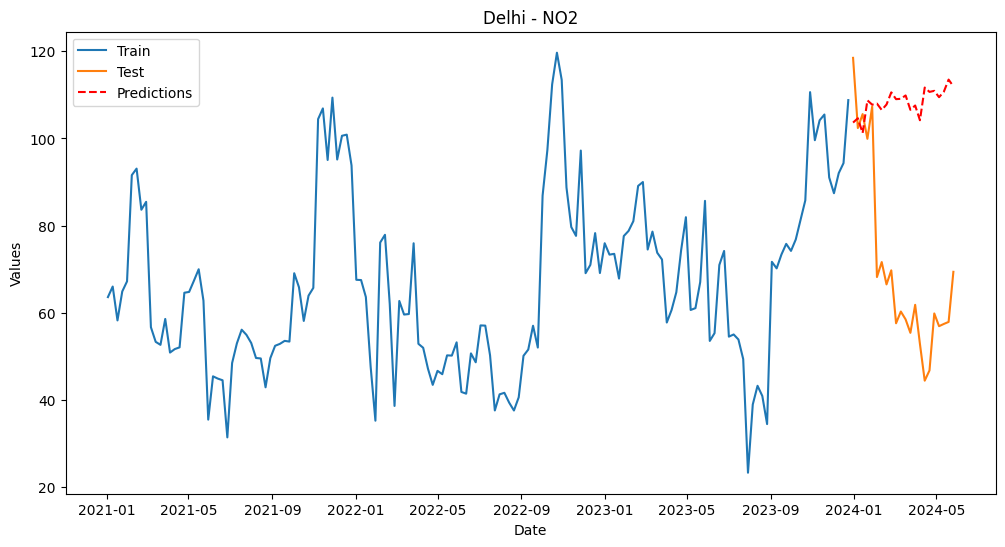

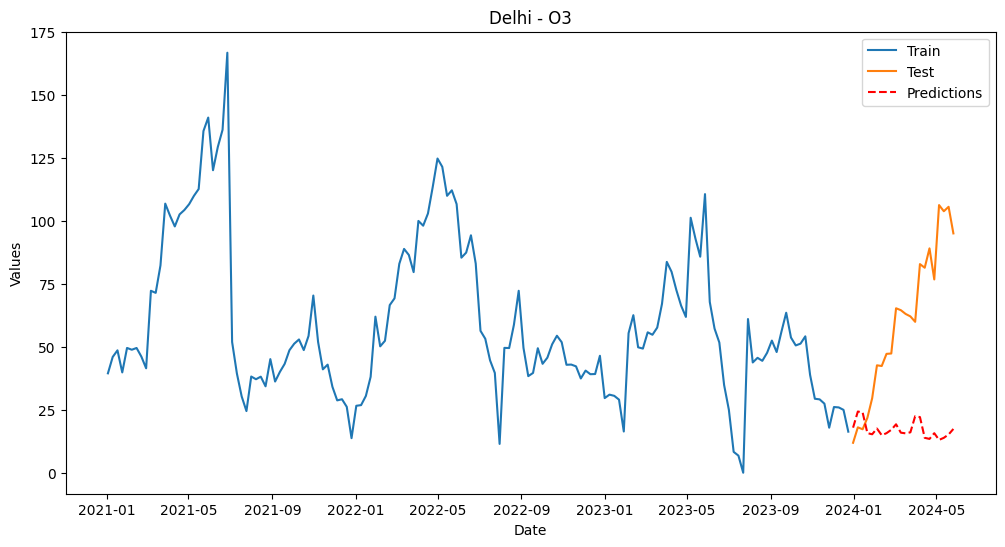

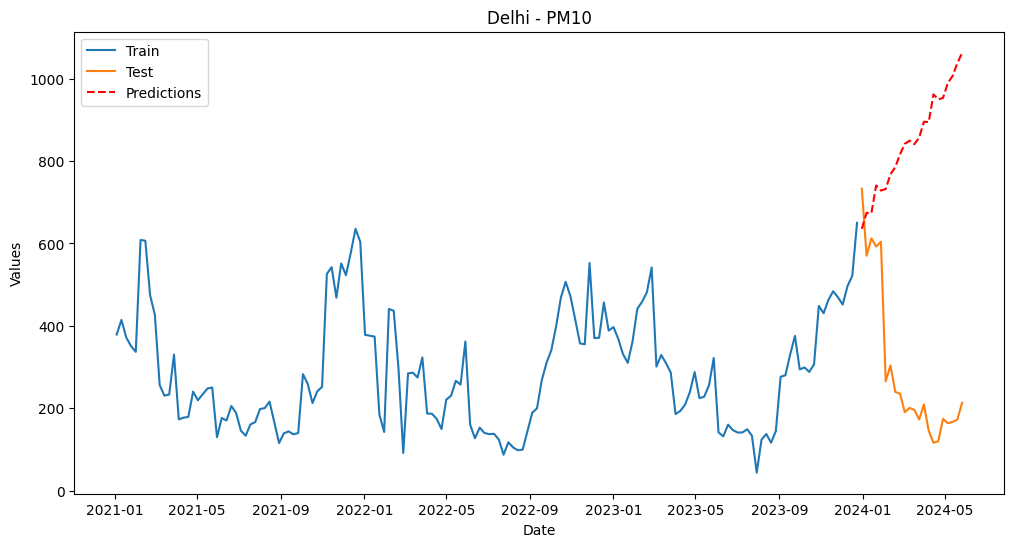

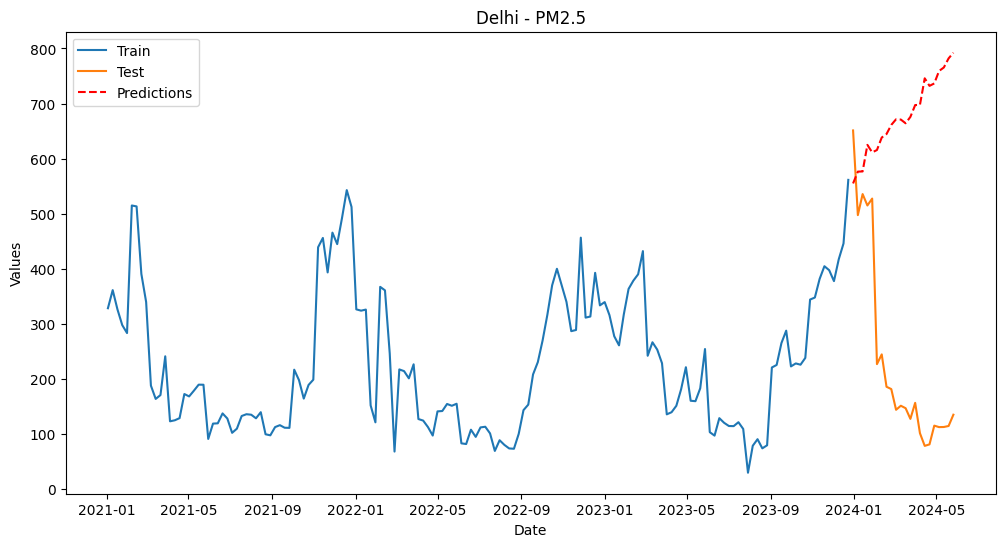

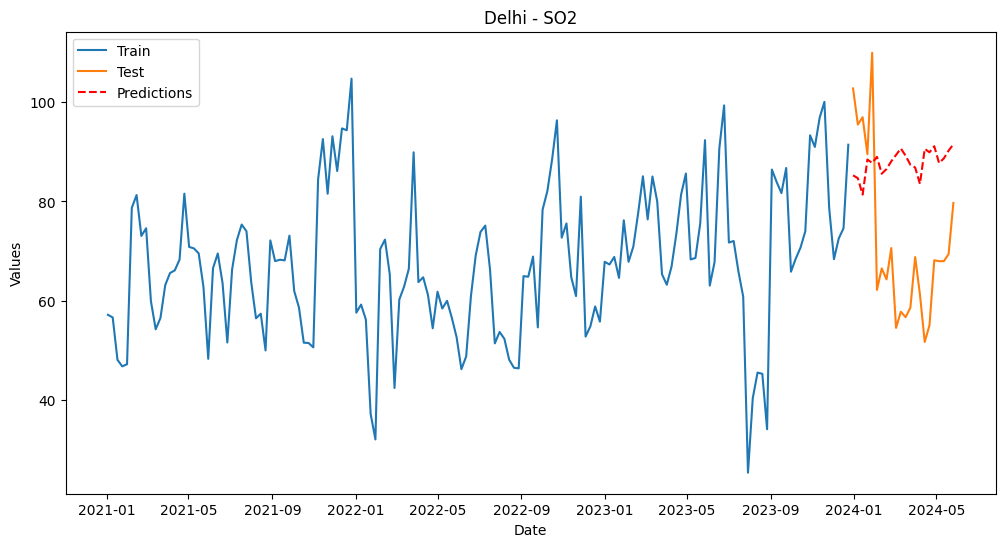

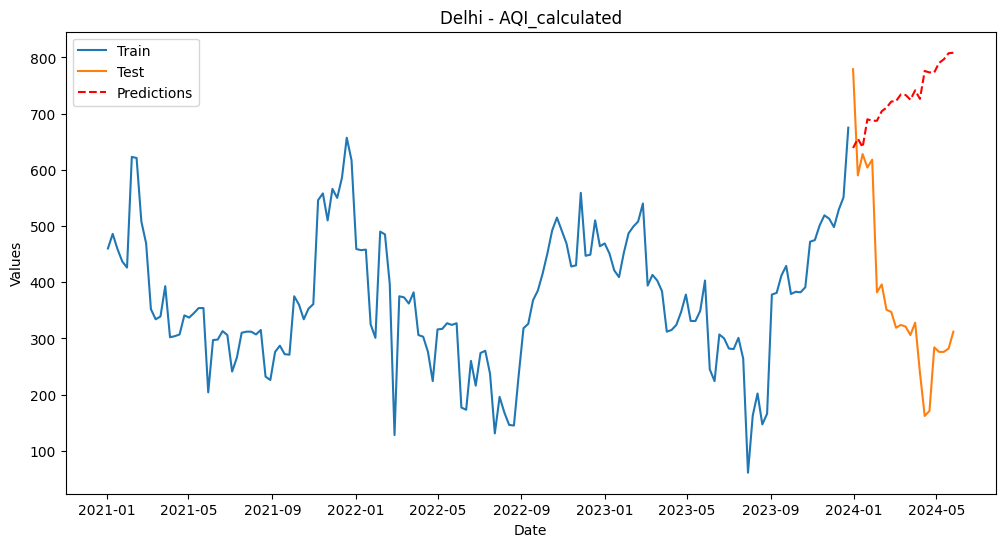

ETS Metrics: {'CO': {'RMSE': 2.689753568034016, 'MAE': 2.433919397895933}, 'NO2': {'RMSE': 44.337892708697204, 'MAE': 39.71766808116087}, 'O3': {'RMSE': 53.33579349736302, 'MAE': 45.24842265272952}, 'PM10': {'RMSE': 631.2297523817219, 'MAE': 568.0317892656193}, 'PM2.5': {'RMSE': 500.96458949998237, 'MAE': 451.89908146362956}, 'SO2': {'RMSE': 23.98696147483606, 'MAE': 22.329826399080392}, 'AQI_calculated': {'RMSE': 405.3640788321178, 'MAE': 364.87871151752483}}


In [13]:

# City to forecast
city_name = 'Delhi'

# Exponential Smoothing (ETS) Forecast
print(f"Forecasting for {city_name} using Exponential Smoothing (ETS)")
ets_forecasts, ets_metrics = city_forecasting_with_plot(city_name, train_data, test_data, ets_forecast, seasonal='add', seasonal_periods=12)
print("ETS Metrics:", ets_metrics)




In [14]:
# Improved ETS Forecasting Function with Robust Error Handling
def ets_forecast(train, test, seasonal_periods=12):
    best_model = None
    best_aic = float('inf')
    best_forecast = None
    
    # Check if the data contains any non-positive values
    contains_non_positive = any(train <= 0)
    
    seasonals = ['add', 'mul'] if not contains_non_positive else ['add']
    trends = ['add', 'mul', None] if not contains_non_positive else ['add', None]
    
    for season in seasonals:
        for trend in trends:
            for damped in [True, False]:
                # Skip invalid damped trend configurations
                if damped and trend is None:
                    continue
                try:
                    with warnings.catch_warnings():
                        warnings.simplefilter('ignore', ConvergenceWarning)
                        warnings.simplefilter('ignore', RuntimeWarning)
                        model = ExponentialSmoothing(train, trend=trend, seasonal=season, seasonal_periods=seasonal_periods, damped_trend=damped)
                        model_fit = model.fit()
                        aic = model_fit.aic
                        forecast = model_fit.forecast(steps=len(test))
                        if aic < best_aic:
                            best_aic = aic
                            best_model = model_fit
                            best_forecast = forecast
                except Exception as e:
                    print(f"Error with model (season={season}, trend={trend}, damped={damped}): {e}")
                    continue
    
    if best_forecast is None:
        print("Warning: No valid model configurations found.")
    return best_forecast

Forecasting for Delhi using Exponential Smoothing (ETS)


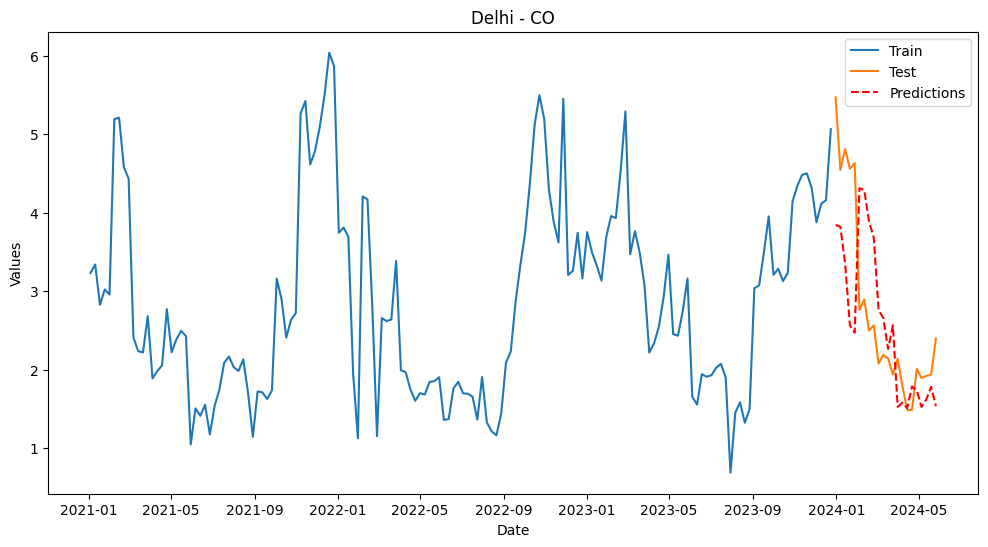

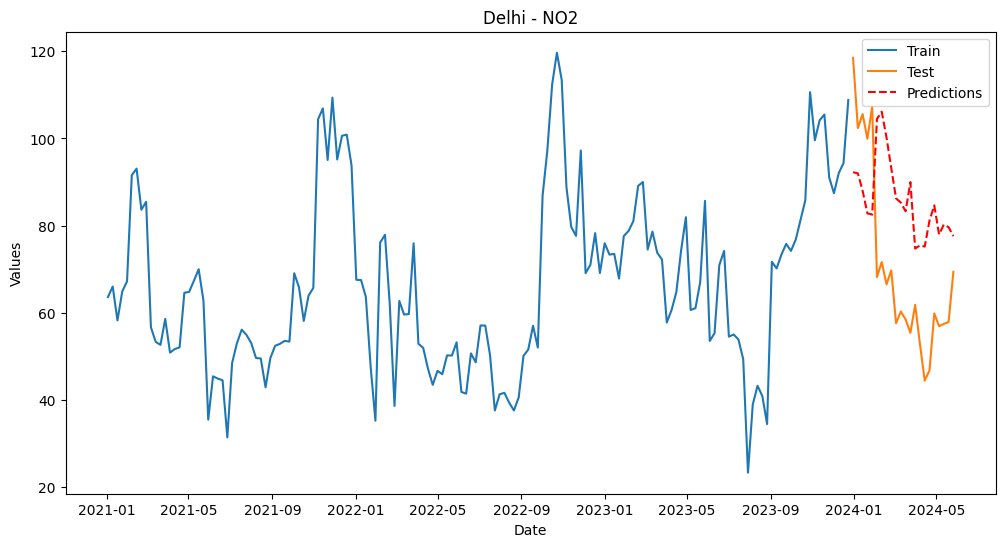

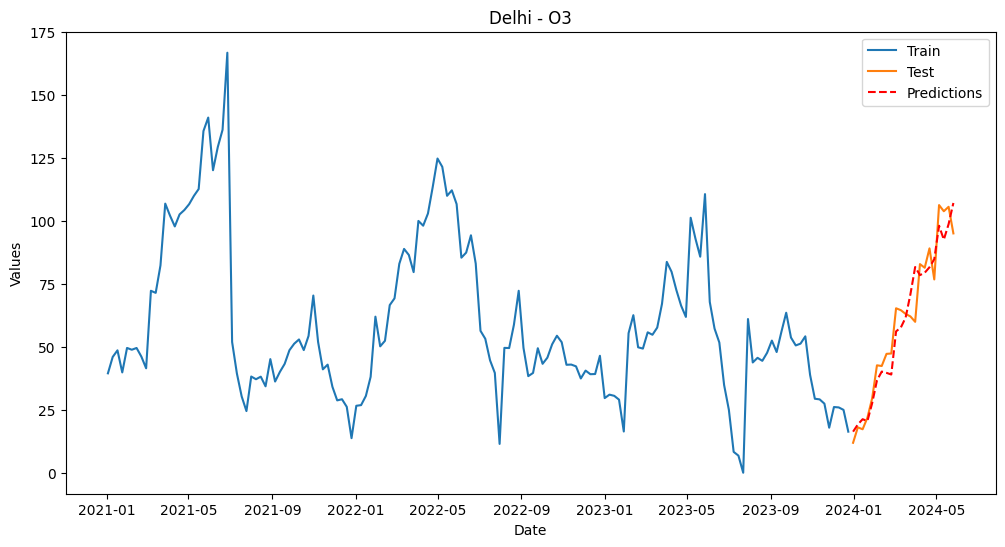

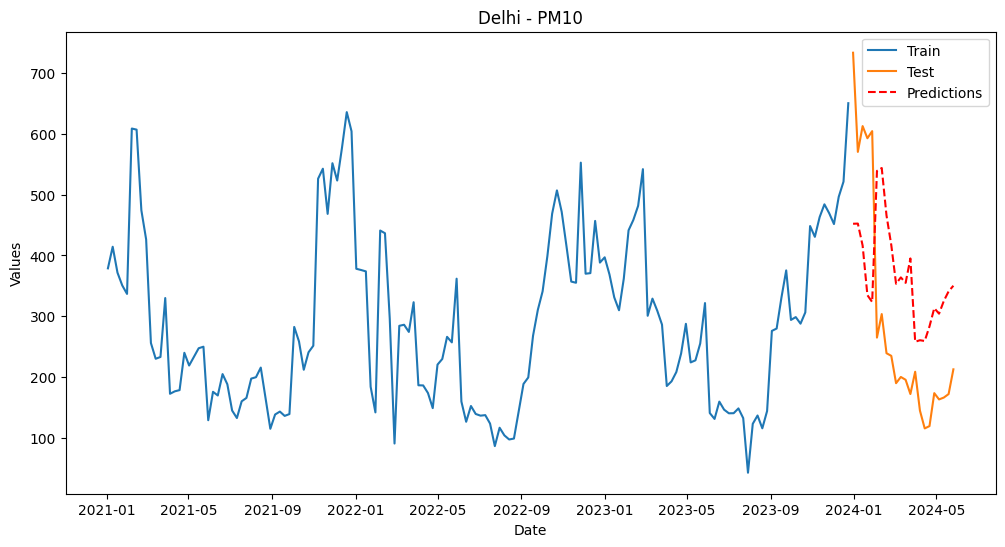

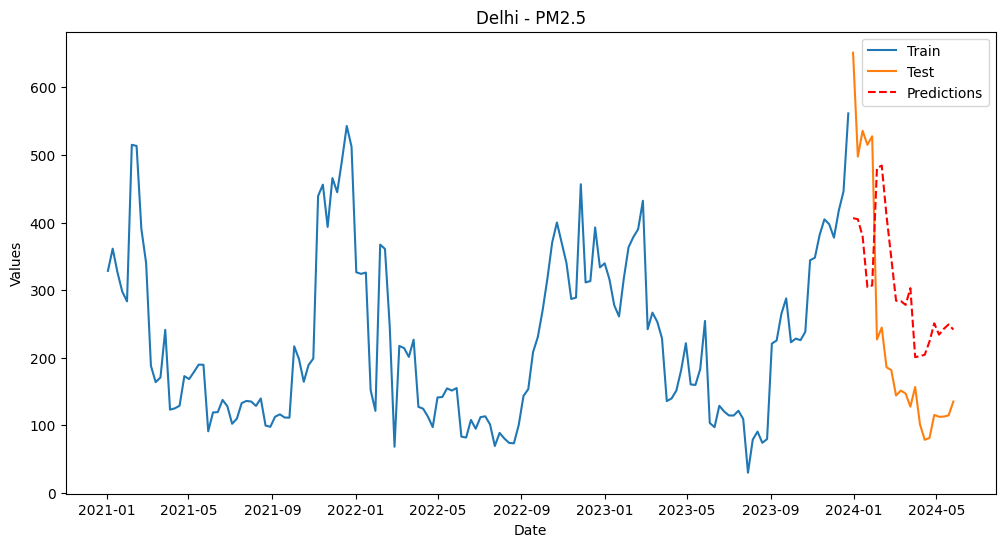

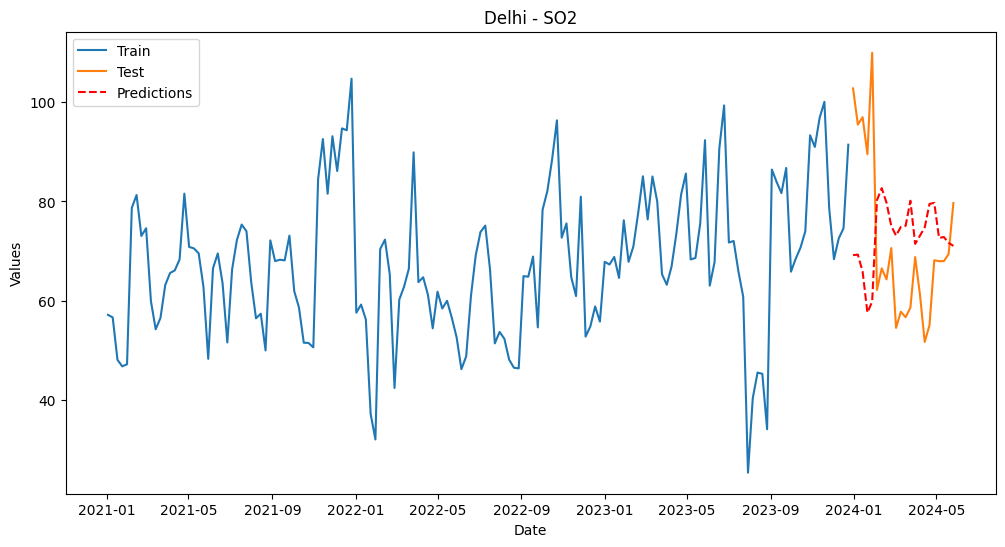

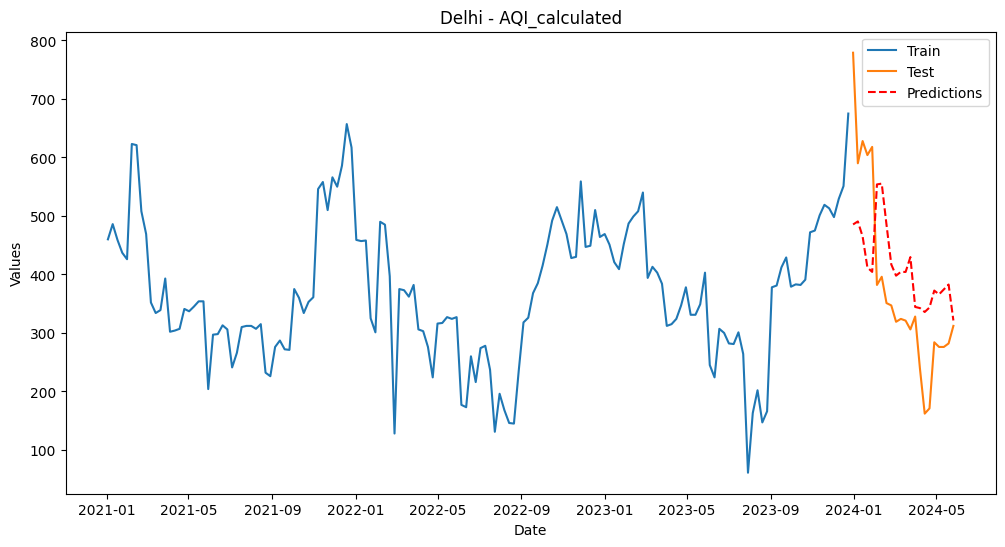

ETS Metrics: {'CO': {'RMSE': 1.0478370731190247, 'MAE': 0.8376332953718016}, 'NO2': {'RMSE': 25.578553126158056, 'MAE': 24.384930230130283}, 'O3': {'RMSE': 8.04704678399953, 'MAE': 6.602009910276172}, 'PM10': {'RMSE': 190.24407285426943, 'MAE': 180.92249112699247}, 'PM2.5': {'RMSE': 164.90585775142287, 'MAE': 155.83974629306232}, 'SO2': {'RMSE': 21.433659379364876, 'MAE': 18.00471613229172}, 'AQI_calculated': {'RMSE': 138.93499187324008, 'MAE': 123.45766815427235}}


In [16]:

# City to forecast
city_name = 'Delhi'

# Exponential Smoothing (ETS) Forecast
print(f"Forecasting for {city_name} using Exponential Smoothing (ETS)")
ets_forecasts, ets_metrics = city_forecasting_with_plot(city_name, train_data, test_data, ets_forecast, seasonal_periods=52)
print("ETS Metrics:", ets_metrics)